In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from pathlib import Path
import seaborn as sns
from Regions import plot_decision_regions
mpl.rcParams['figure.figsize'] = (12,10)

data_path = Path.cwd().parent / 'data'/ 'heart.csv'
df = pd.read_csv(data_path)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


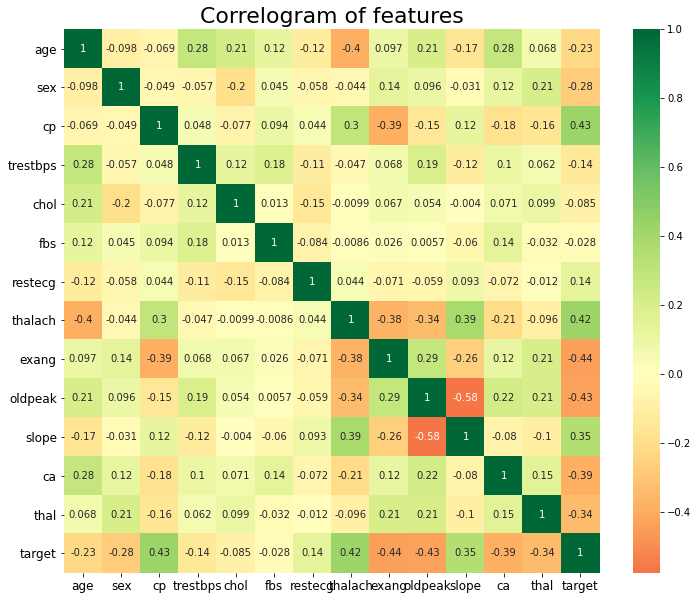

In [33]:
# Plot
sns.heatmap(df.corr(), xticklabels=df.corr().columns,
            yticklabels=df.corr().columns, 
            cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of features', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Произведем анализ для всех входных свойств:

In [2]:
X = df.iloc[:,0:13].values
y = df.iloc[:,-1].values

### Разбиваем модель

In [3]:
from sklearn.model_selection import train_test_split

s = train_test_split(X, y, test_size=0.1, stratify=y, random_state = 1)
X_train, X_test, y_train, y_test = s

### Масштабируем признаки

In [4]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler().fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# Персептрон

In [5]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(max_iter = 50, eta0 = 0.1, random_state=1).fit(X_train_std, y_train)

In [6]:
from sklearn.metrics import accuracy_score

def log_errors(val_train, val_test):
    y_train_pred = val_train
    y_test_pred = val_test
    
    num1 = (y_train != y_train_pred).sum()  
    num2 = (y_test != y_test_pred).sum()
    
    acc1 = round(accuracy_score(y_train, y_train_pred)*100,2)
    acc2 = round(accuracy_score(y_test, y_test_pred)*100,2)
    return print(f'Кол-во ошибок обучающей выборки = {num1} \n', 
                 f'Кол-во ошибок тестовой выборки = {num2} \n',
                 f'Оценка точности обучающей выборки = {acc1} \n',
                 f'Оценка точности тестовой выборки = {acc2}', sep='\n')
               

In [7]:
log_errors(ppn.predict(X_train_std), ppn.predict(X_test_std))

Кол-во ошибок обучающей выборки = 53 

Кол-во ошибок тестовой выборки = 6 

Оценка точности обучающей выборки = 80.51 

Оценка точности тестовой выборки = 80.65


# Логистическая регрессия

In [8]:
from sklearn.linear_model import LogisticRegression
LgReg = LogisticRegression(random_state  = 1, C = 100.0).fit(X_train_std, y_train)

In [9]:
log_errors(LgReg.predict(X_train_std), LgReg.predict(X_test_std))

Кол-во ошибок обучающей выборки = 42 

Кол-во ошибок тестовой выборки = 2 

Оценка точности обучающей выборки = 84.56 

Оценка точности тестовой выборки = 93.55


# Метод опорных векторов  

In [10]:
from sklearn.svm import SVC
svm1 = SVC(kernel='linear', C=1.0, random_state=1).fit(X_train_std, y_train)
log_errors(svm1.predict(X_train_std), svm1.predict(X_test_std))

Кол-во ошибок обучающей выборки = 43 

Кол-во ошибок тестовой выборки = 3 

Оценка точности обучающей выборки = 84.19 

Оценка точности тестовой выборки = 90.32


### C=100

In [11]:
svm1 = SVC(kernel='linear', C=100.0, random_state=1).fit(X_train_std, y_train)
log_errors(svm1.predict(X_train_std), svm1.predict(X_test_std))

Кол-во ошибок обучающей выборки = 42 

Кол-во ошибок тестовой выборки = 3 

Оценка точности обучающей выборки = 84.56 

Оценка точности тестовой выборки = 90.32


### C=1000

In [12]:
svm1 = SVC(kernel='linear', C=1000.0, random_state=1).fit(X_train_std, y_train)
log_errors(svm1.predict(X_train_std), svm1.predict(X_test_std))

Кол-во ошибок обучающей выборки = 42 

Кол-во ошибок тестовой выборки = 3 

Оценка точности обучающей выборки = 84.56 

Оценка точности тестовой выборки = 90.32


### Выберем ядро RBF

In [13]:
svm1 = SVC(kernel='rbf', C=1.0, random_state=1).fit(X_train_std, y_train)
log_errors(svm1.predict(X_train_std), svm1.predict(X_test_std))

Кол-во ошибок обучающей выборки = 22 

Кол-во ошибок тестовой выборки = 4 

Оценка точности обучающей выборки = 91.91 

Оценка точности тестовой выборки = 87.1


### C=100

In [14]:
svm1 = SVC(kernel='rbf', C=100.0, random_state=1).fit(X_train_std, y_train)
log_errors(svm1.predict(X_train_std), svm1.predict(X_test_std))

Кол-во ошибок обучающей выборки = 0 

Кол-во ошибок тестовой выборки = 8 

Оценка точности обучающей выборки = 100.0 

Оценка точности тестовой выборки = 74.19


### C=1000

In [15]:
svm1 = SVC(kernel='rbf', C=1000.0, random_state=1).fit(X_train_std, y_train)
log_errors(svm1.predict(X_train_std), svm1.predict(X_test_std))

Кол-во ошибок обучающей выборки = 0 

Кол-во ошибок тестовой выборки = 8 

Оценка точности обучающей выборки = 100.0 

Оценка точности тестовой выборки = 74.19


# Метод ближайших соседей

In [16]:
from sklearn.neighbors import KNeighborsClassifier
nei1 = KNeighborsClassifier(n_neighbors=3).fit(X_train_std, y_train)
log_errors(nei1.predict(X_train_std), nei1.predict(X_test_std))

Кол-во ошибок обучающей выборки = 33 

Кол-во ошибок тестовой выборки = 6 

Оценка точности обучающей выборки = 87.87 

Оценка точности тестовой выборки = 80.65


In [17]:
from sklearn.neighbors import KNeighborsClassifier
nei2 = KNeighborsClassifier(n_neighbors=7).fit(X_train_std, y_train)
log_errors(nei2.predict(X_train_std), nei2.predict(X_test_std))

Кол-во ошибок обучающей выборки = 39 

Кол-во ошибок тестовой выборки = 5 

Оценка точности обучающей выборки = 85.66 

Оценка точности тестовой выборки = 83.87


### Произведем анализ для свойств c показателем корелляции более 0.3. В данный диапазон попадают колонки ('CP', 'Thalac', 'Slope')

In [31]:
dt = df[['thalach','slope']]
X = dt.iloc[:,:].values
y = df.iloc[:,-1].values
dt.head()

,thalach,slope
0,150,0
1,187,0
2,172,2
3,178,2
4,163,2


In [32]:
s = train_test_split(X, y, test_size=0.3, stratify=y, random_state = 1)
X_train, X_test, y_train, y_test = s

In [33]:
sc = StandardScaler().fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [37]:
Male = y == 1
Female = y == 0

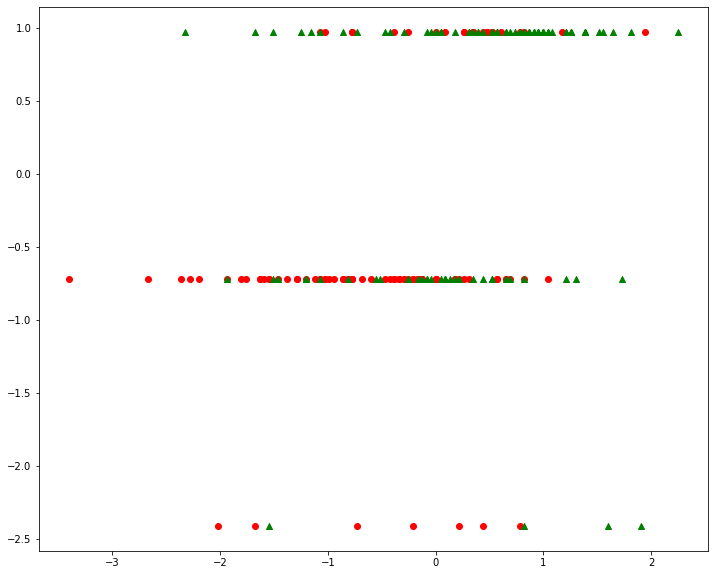

In [35]:
plt.scatter(X_train_std[y_train==0,0], X_train_std[y_train==0,1], color = 'red', marker='o')
plt.scatter(X_train_std[y_train==1,0], X_train_std[y_train==1,1], color = 'green', marker='^')

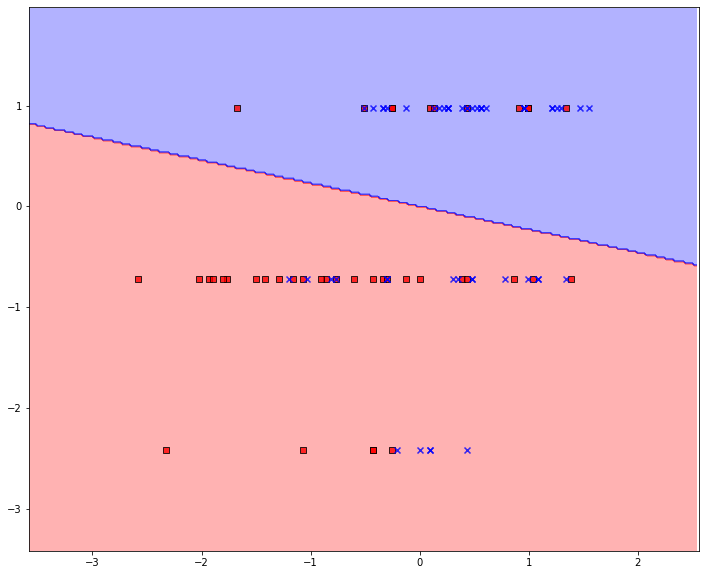

In [36]:
ppn = Perceptron(max_iter = 40, eta0 = 0.1, random_state=1).fit(X_train_std, y_train)
plot_decision_regions(X_test_std, y_test, classifier = ppn)